**EDA - 1**
 About - Dataset:
 Here is the dataset link:
**Bike Details Dataset**
 The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes.
 **Title: Bike Details Dataset**
 Source:
 The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.
 Description:
 The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.
 The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.
 **Title: Bike Details Dataset**
 =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")
 selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)
 year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)
 seller_type: Seller category, either "Individual" or "Dealer" (Categorical)
 owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)
 km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)
 ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
# Display all column names
print(df.columns.tolist())


['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


In [ ]:
#1.What is the range of selling prices in the dataset.
import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
#1.What is the range of selling prices in the dataset.
import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
min_price = df["selling_price"].min()
max_price = df["selling_price"].max()
print("selling price range=", min_price,"-",max_price)

selling price range= 5000 - 760000


In [ ]:
#2.What is the median selling price for bikes in the dataset?
import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
median_price = df["selling_price"].median()
print("Median Selling Price:", median_price)


Median Selling Price: 45000.0


In [ ]:
#3.What is the most common seller type?
import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
most_common_seller = df["seller_type"].mode()[0]
print("Most Common Seller Type:", most_common_seller)


In [ ]:
#4.How many bikes have driven more than 50,000 kilometers?
bikes_over_50000_km = df[df["km_driven"] > 50000].shape[0]
print("Number of bikes driven over 50,000 km:", bikes_over_50000_km)

Number of bikes driven over 50,000 km: 170


In [ ]:
#5. What is the average km_driven value for each ownership type?
average_km_driven_by_ownership = df.groupby("owner")["km_driven"].mean()
print("Average km_driven by ownership type:",average_km_driven_by_ownership)

Average km_driven by ownership type: owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
#6.What proportion of bikes are from the year 2015 or older?
bikes_from_2015_or_older = df[df["year"] >= 2015].shape[0]
print("Number of bikes from 2015 or older:", bikes_from_2015_or_older)

Number of bikes from 2015 or older: 560


In [ ]:
#7. What is the trend of missing values across the dataset?
missing_values_trend = df.isnull().sum()
print("Missing values trend:",missing_values_trend)

Missing values trend: name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
#8.What is the highest ex_showroom_price recorded, and for which bike?
max_ex_price = df["ex_showroom_price"].max()
bike_with_max_ex_price = df[df["ex_showroom_price"] == max_ex_price][["name", "ex_showroom_price"]]
print(bike_with_max_ex_price)



                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


In [ ]:
#9.What is the total number of bikes listed by each seller type?
total_bikes_by_seller = df.groupby("seller_type")["name"].count()
print("Total number of bikes listed by each seller type:",total_bikes_by_seller)

Total number of bikes listed by each seller type: seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64


In [ ]:
#10.What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df[df["owner"] == "1st owner"]
correlation = first_owner_bikes["selling_price"].corr(first_owner_bikes["km_driven"])
print("Correlation between Selling Price and KM Driven (1st Owner Bikes):", correlation)


Correlation between Selling Price and KM Driven (1st Owner Bikes): -0.2434817484496572


In [ ]:
#11.Identify and remove outliers in the km_driven column using the IQR method.
# Calculate Q1, Q3, and IQR
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
df_no_outliers = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]
# Count how many rows were removed
rows_removed = df.shape[0] - df_no_outliers.shape[0]
print("Number of outliers removed:", rows_removed)


Number of outliers removed: 39


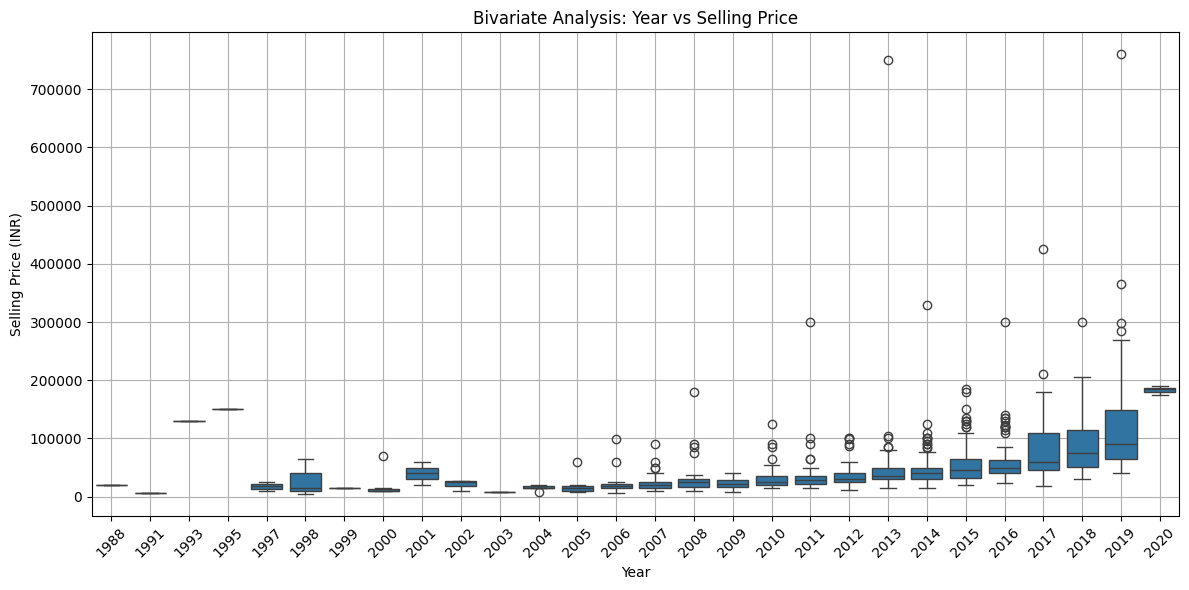

In [ ]:
#12.Perform a bivariate analysis to visualize the relationship between year and selling_price?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")
# Set up the plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="year", y="selling_price")
# Add titles and labels
plt.title("Bivariate Analysis: Year vs Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price (INR)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()


In [ ]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
current_year = 2025
df["bike_age"] = current_year - df["year"]
average_depreciation = df["selling_price"].mean() - df["ex_showroom_price"].mean()
print("Average Depreciation in Selling Price:", average_depreciation)

Average Depreciation in Selling Price: -28320.56231386991


In [ ]:
#14.Which bike names are priced significantly above the average price for their manufacturing year?
average_price_by_year = df.groupby("year")["selling_price"].mean()
df["average_price_by_year"] = df["year"].map(average_price_by_year)
significant_priced_bikes = df[df["selling_price"] > df["average_price_by_year"]]
print("Bike names priced significantly above the average price for their manufacturing year:\n",significant_priced_bikes["name"])

Bike names priced significantly above the average price for their manufacturing year:
 0                  Royal Enfield Classic 350
2        Royal Enfield Classic Gunmetal Grey
3          Yamaha Fazer FI V 2.0 [2016-2018]
7       Royal Enfield Bullet 350 [2007-2011]
13                             Yamaha YZF R3
                        ...                 
1004                    Bajaj Pulsar  NS 200
1005                      TVS Apache RTR 160
1008                      Bajaj Pulsar 220 F
1012                     Bajaj Pulsar NS 200
1023                  Bajaj Avenger 220 dtsi
Name: name, Length: 334, dtype: object


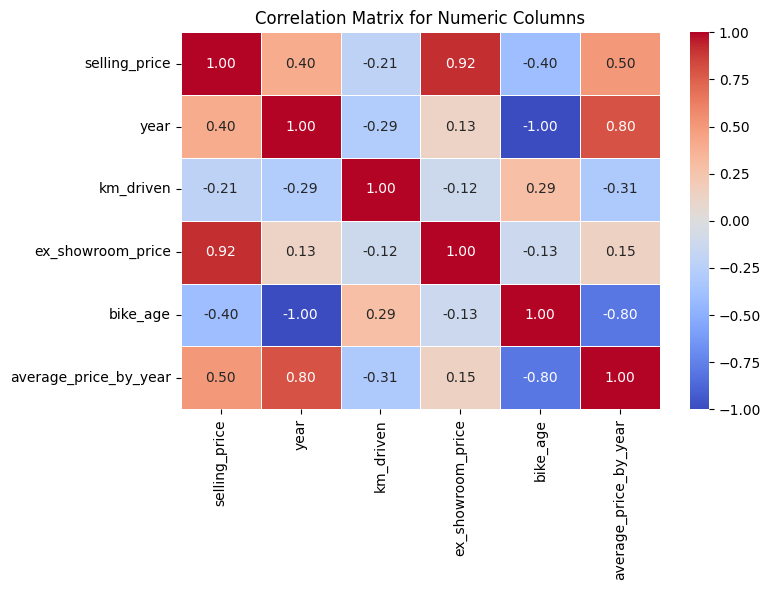

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_df = df.select_dtypes(include=['number'])
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numeric Columns")
plt.tight_layout()
plt.show()


 EDA - 2
 About - Dataset:
 **Car Sales**
 Here is the dataset link:
 The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and
consumer behavior.
 **Title: Car Sale Dataset**
 Source:
 The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.
 Description:
 The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences.
Features:
 Car_id: A unique identifier for each car in the dataset, helping to track individual car entries
 Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD
 Customer Name: The name of the customer who purchased the car, represented as a string
 Gender: The gender of the customer, categorized as "Male" or "Female.
 Annual Income: The customer's annual income in US dollars, represented as a numeric value
 Dealer_Name: The name of the dealership selling the car, represented as a string
 Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc
 Model: The specific model name of the car, such as "Corolla," "Civic," etc
 Engine: The engine type of the car, such as "V6," "I4," etc
 Price ($): The selling price of the car in US dollars
 Transmission: The type of transmission in the car, either "Manual" or "Automatic.
 Color: The color of the car, represented as a string (e.g., "Red," "Blue")
 Dealer_No: A unique identifier for each car dealer in the dataset
 Body Style: The body style of the car, such as "Sedan," "SUV," etc
 Phone: The phone number of the customer who purchased the car
 Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Car Sale.csv to Car Sale.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
car_df = pd.read_csv("Car Sale.csv")
# Display all column names
print(df.columns.tolist())

['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region']


<ipython-input-59-8d7cdec66261>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_dealer_sorted.head(10), x="Price ($)", y="Dealer_Name", palette="plasma")


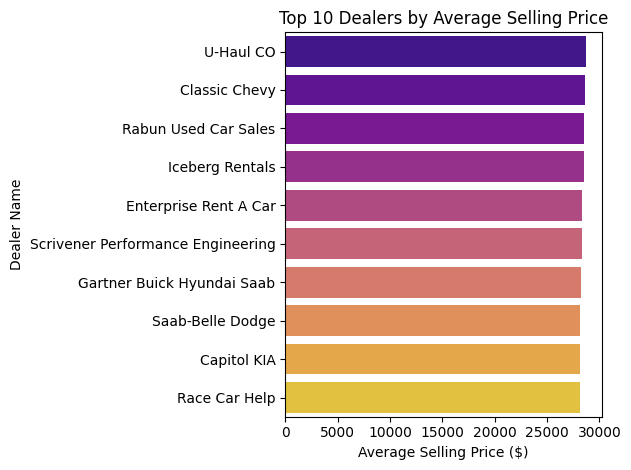

                          Dealer_Name     Price ($)
27                          U-Haul CO  28769.919006
5                       Classic Chevy  28602.014446
19               Rabun Used Car Sales  28527.536177
11                    Iceberg Rentals  28522.958533
8               Enterprise Rent A Car  28312.580800
23  Scrivener Performance Engineering  28297.371589
9          Gartner Buick Hyundai Saab  28247.621019
22                   Saab-Belle Dodge  28190.139888
2                         Capitol KIA  28189.703822
20                      Race Car Help  28163.372706


In [ ]:
#1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = car_df.groupby("Dealer_Name")["Price ($)"].mean().reset_index()
# Sort by average price descending
avg_price_by_dealer_sorted = avg_price_by_dealer.sort_values(by="Price ($)", ascending=False)
# Plot the top 10 dealers
sns.barplot(data=avg_price_by_dealer_sorted.head(10), x="Price ($)", y="Dealer_Name", palette="plasma")
plt.title("Top 10 Dealers by Average Selling Price")
plt.xlabel("Average Selling Price ($)")
plt.ylabel("Dealer Name")
plt.tight_layout()
plt.show()
print(avg_price_by_dealer_sorted.head(10))



<ipython-input-58-9b01fabae670>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_variation_sorted.head(10), x="Price ($)", y="Company", palette="magma")


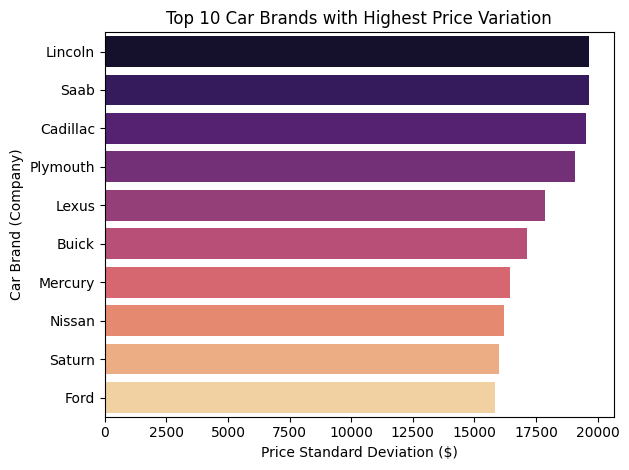

Brand with highest price variation:     Company     Price ($)
15  Lincoln  19658.050211


In [ ]:
#2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
price_variation_by_brand = car_df.groupby("Company")["Price ($)"].std().reset_index()
# Sort the brands by highest standard deviation
price_variation_sorted = price_variation_by_brand.sort_values(by="Price ($)", ascending=False)
# Plot the top 10 brands with highest price variation
sns.barplot(data=price_variation_sorted.head(10), x="Price ($)", y="Company", palette="magma")
plt.title("Top 10 Car Brands with Highest Price Variation")
plt.xlabel("Price Standard Deviation ($)")
plt.ylabel("Car Brand (Company)")
plt.tight_layout()
plt.show()

# Display the top brand with the highest price variation
print("Brand with highest price variation:",price_variation_sorted.head(1))

<ipython-input-57-279c5e88f869>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_df, x="Transmission", y="Price ($)", palette="viridis")


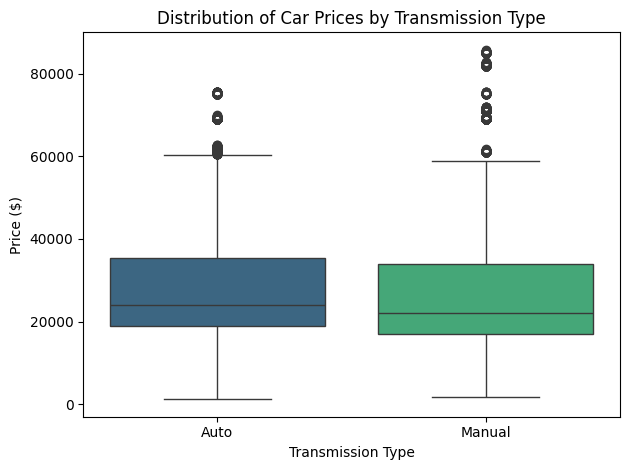

Interquartile Range (IQR) by Transmission Type:                  0.25     0.75      IQR
Transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


In [ ]:
#3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
sns.boxplot(data=car_df, x="Transmission", y="Price ($)", palette="viridis")
plt.title("Distribution of Car Prices by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()
iqr_by_transmission = car_df.groupby("Transmission")["Price ($)"].quantile([0.25, 0.75]).unstack()
# Calculate IQR
iqr_by_transmission["IQR"] = iqr_by_transmission[0.75] - iqr_by_transmission[0.25]
# Print IQR values
print("Interquartile Range (IQR) by Transmission Type:",iqr_by_transmission)

<ipython-input-56-a2152dc355b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_df, x="Dealer_Region", y="Price ($)", palette="viridis")


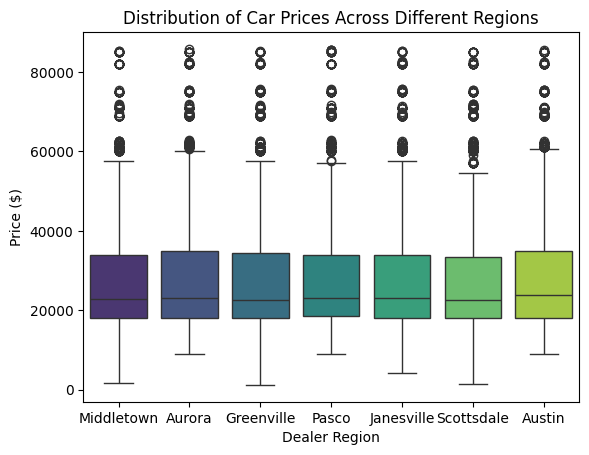

In [ ]:
#4. What is the distribution of car prices across different regions?
sns.boxplot(data=car_df, x="Dealer_Region", y="Price ($)", palette="viridis")
plt.title("Distribution of Car Prices Across Different Regions")
plt.xlabel("Dealer Region")
plt.ylabel("Price ($)")
plt.show()


<ipython-input-55-b111f4e6d7bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car_df, x="Body Style", palette="viridis")


([0, 1, 2, 3, 4],
 [Text(0, 0, 'SUV'),
  Text(1, 0, 'Passenger'),
  Text(2, 0, 'Hatchback'),
  Text(3, 0, 'Hardtop'),
  Text(4, 0, 'Sedan')])

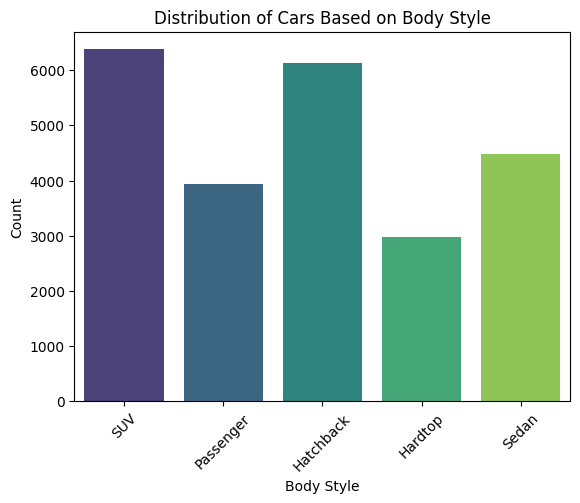

In [ ]:
#5. What is the distribution of cars based on body styles?
sns.countplot(data=car_df, x="Body Style", palette="viridis")
plt.title("Distribution of Cars Based on Body Style")
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.xticks(rotation=45)


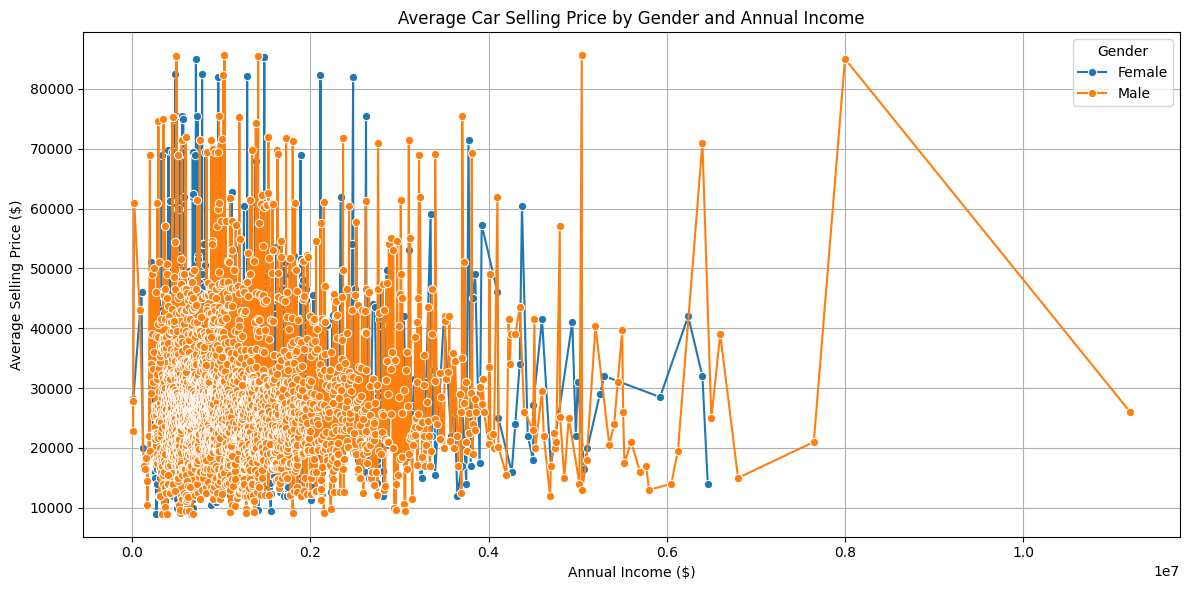

In [ ]:
#6. How does the average selling price of cars vary by customer gender and annual income?
avg_price_by_gender_income = car_df.groupby(["Gender", "Annual Income"])["Price ($)"].mean().reset_index()
# Plot using a lineplot to visualize variation
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_by_gender_income, x="Annual Income", y="Price ($)", hue="Gender", marker="o")
plt.title("Average Car Selling Price by Gender and Annual Income")
plt.xlabel("Annual Income ($)")
plt.ylabel("Average Selling Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-63-67d06ffca5c6>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=car_df, x="Dealer_Region", y="Price ($)", palette="viridis")


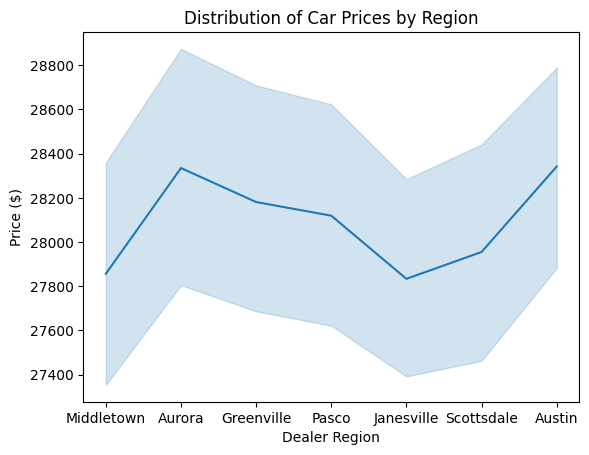

In [ ]:
#7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?
sns.lineplot(data=car_df, x="Dealer_Region", y="Price ($)", palette="viridis")
plt.title("Distribution of Car Prices by Region")
plt.xlabel("Dealer Region")
plt.ylabel("Price ($)")
plt.show()


<ipython-input-64-c5f4ccd23326>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=car_df, x="Engine", y="Price ($)", palette="viridis")


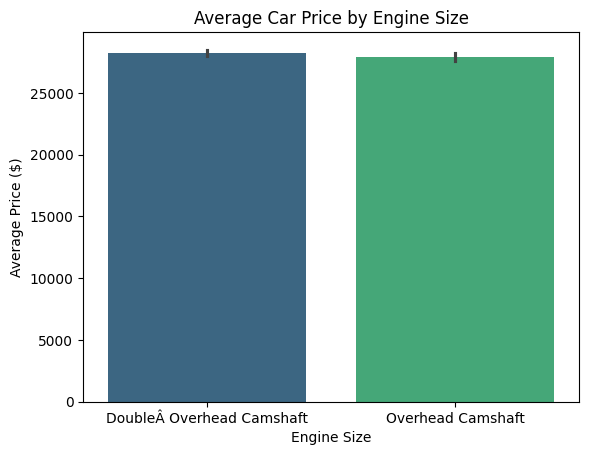

In [ ]:
#8.How does the average car price differ between cars with different engine sizes?
sns.barplot(data=car_df, x="Engine", y="Price ($)", palette="viridis")
plt.title("Average Car Price by Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Average Price ($)")
plt.show()


<ipython-input-67-3daa8adaf7ea>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_bracket = car_df.groupby('Income_Bracket')["Price ($)"].mean().reset_index()
<ipython-input-67-3daa8adaf7ea>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_bracket, x='Income_Bracket', y='Price ($)', palette='Blues_d')


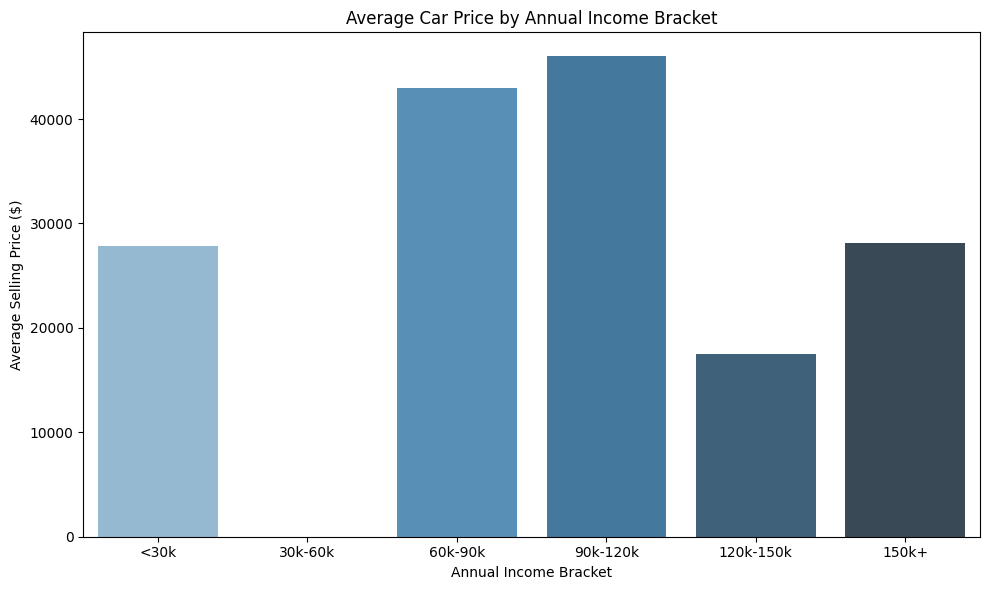

  Income_Bracket     Price ($)
0           <30k  27884.297820
1        30k-60k           NaN
2        60k-90k  43000.000000
3       90k-120k  46001.000000
4      120k-150k  17500.000000
5          150k+  28149.089557


In [ ]:
#9.How do car prices vary based on the customer’s annual income bracket?
# Create income brackets (you can adjust the ranges as needed)
bins = [0, 30000, 60000, 90000, 120000, 150000, float('inf')]
labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']
car_df['Income_Bracket'] = pd.cut(car_df['Annual Income'], bins=bins, labels=labels)
# Calculate average price per bracket
avg_price_by_bracket = car_df.groupby('Income_Bracket')["Price ($)"].mean().reset_index()
# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_bracket, x='Income_Bracket', y='Price ($)', palette='Blues_d')
plt.title("Average Car Price by Annual Income Bracket")
plt.xlabel("Annual Income Bracket")
plt.ylabel("Average Selling Price ($)")
plt.tight_layout()
plt.show()
# Display the average prices by bracket
print(avg_price_by_bracket)


<ipython-input-69-81b24c1fc927>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_model_data, x="Model", y="Price ($)", palette="pastel")


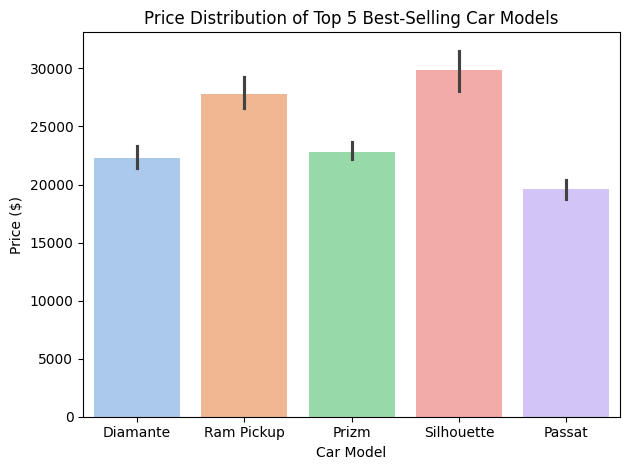

Top 5 Car Models by Sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


In [ ]:
#10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = car_df['Model'].value_counts().head(5).index
top_model_data = car_df[car_df['Model'].isin(top_models)]
# Create a boxplot to visualize price distribution for top models
sns.barplot(data=top_model_data, x="Model", y="Price ($)", palette="pastel")
plt.title("Price Distribution of Top 5 Best-Selling Car Models")
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()
# Display the top 5 models with their sales count
print("Top 5 Car Models by Sales:")
print(car_df['Model'].value_counts().head(5))

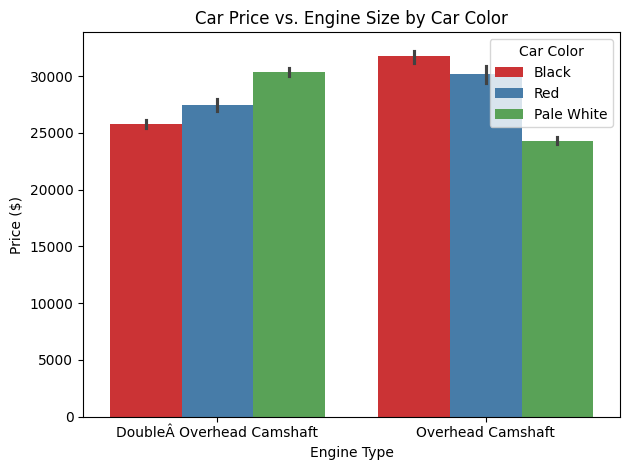

Price Variation by Car Color:         Color     Price ($)
2         Red  15519.360962
0       Black  15286.065976
1  Pale White  14077.346859


In [ ]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
sns.barplot(data=car_df, x="Engine", y="Price ($)", hue="Color", palette="Set1")
plt.title("Car Price vs. Engine Size by Car Color")
plt.xlabel("Engine Type")
plt.ylabel("Price ($)")
plt.legend(title="Car Color")
plt.tight_layout()
plt.show()
# Calculate price variation (standard deviation) for each car color
price_variation_by_color = car_df.groupby("Color")["Price ($)"].std().reset_index()
price_variation_by_color = price_variation_by_color.sort_values(by="Price ($)", ascending=False)
print("Price Variation by Car Color:",price_variation_by_color)

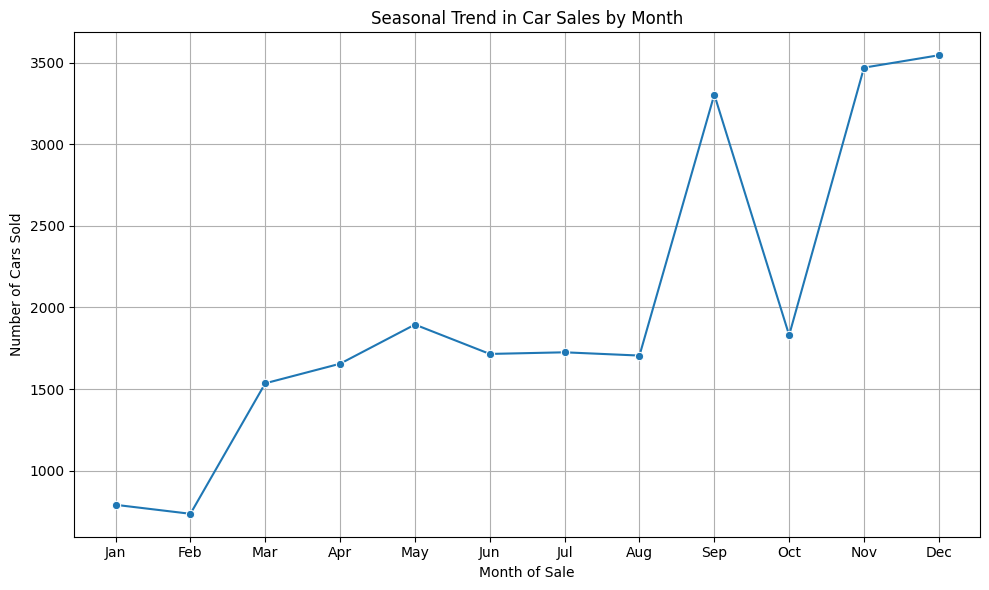

Monthly Car Sales:
Sale_Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


In [ ]:
#12. Is there any seasonal trend in car sales based on the date of sale?
car_df["Date"] = pd.to_datetime(car_df["Date"])
# Extract month from the date
car_df["Sale_Month"] = car_df["Date"].dt.month
# Count number of sales per month
monthly_sales = car_df["Sale_Month"].value_counts().sort_index()
# Plot the seasonal trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Seasonal Trend in Car Sales by Month")
plt.xlabel("Month of Sale")
plt.ylabel("Number of Cars Sold")
plt.xticks(ticks=range(1,13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                      "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.tight_layout()
plt.show()

# Display monthly sales data
print("Monthly Car Sales:")
print(monthly_sales)



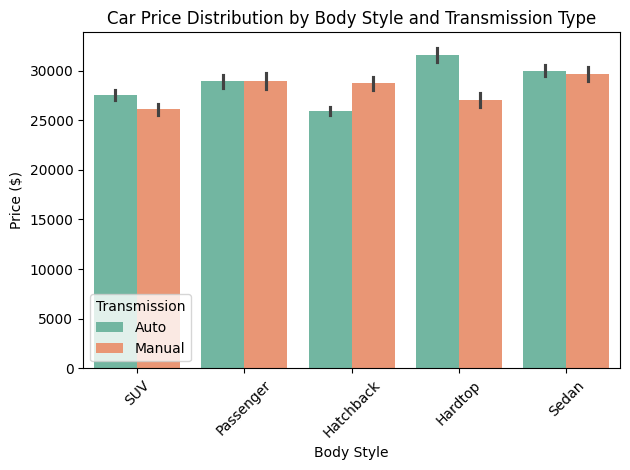

In [ ]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?
sns.barplot(data=car_df, x="Body Style", y="Price ($)", hue="Transmission", palette="Set2")
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.legend(title="Transmission")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

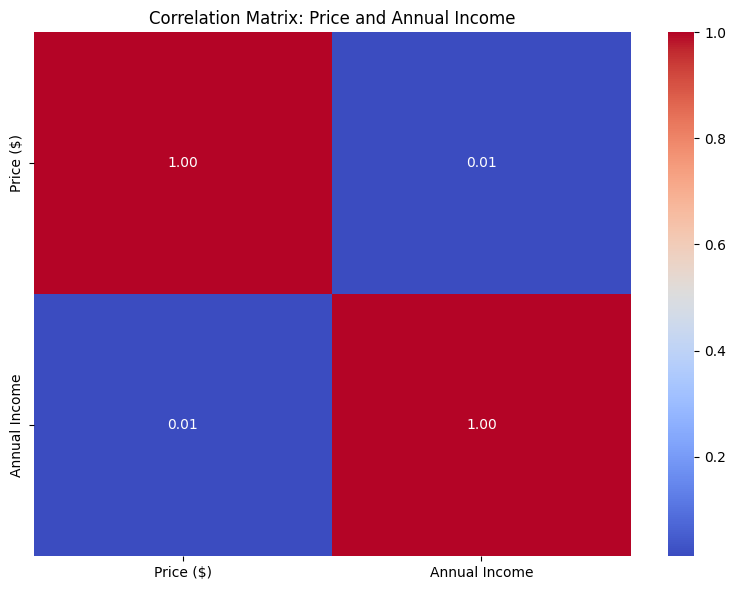

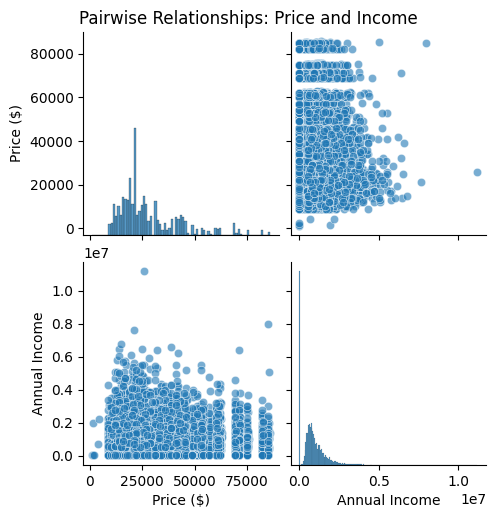


Average Price and Annual Income by Engine Type:
                              Price ($)  Annual Income
Engine                                                
DoubleÂ Overhead Camshaft  28248.525972  835351.185745
Overhead Camshaft          27914.710631  825837.503308


In [ ]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
selected_cols_numeric = car_df[["Price ($)", "Annual Income"]]

# Drop rows with missing values (if any)
selected_cols_numeric = selected_cols_numeric.dropna()

# Compute correlation matrix for numeric columns
correlation_matrix = selected_cols_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Price and Annual Income")
plt.tight_layout()
plt.show()

# Pair plot to visualize interactions for numeric columns
sns.pairplot(selected_cols_numeric, kind='scatter', plot_kws={'alpha':0.6})
plt.suptitle("Pairwise Relationships: Price and Income", y=1.02)
plt.show()

# To explore the relationship with 'Engine', we can use visualizations that handle categorical data,
# such as a boxplot or barplot, as done in question 8.
# We can also group by 'Engine' and calculate the average price and income for each engine type.
print("\nAverage Price and Annual Income by Engine Type:")
print(car_df.groupby("Engine")[["Price ($)", "Annual Income"]].mean())

<ipython-input-81-50a7fcb36dbd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_model_engine, x="Model_Engine", y="Price ($)", palette="viridis")


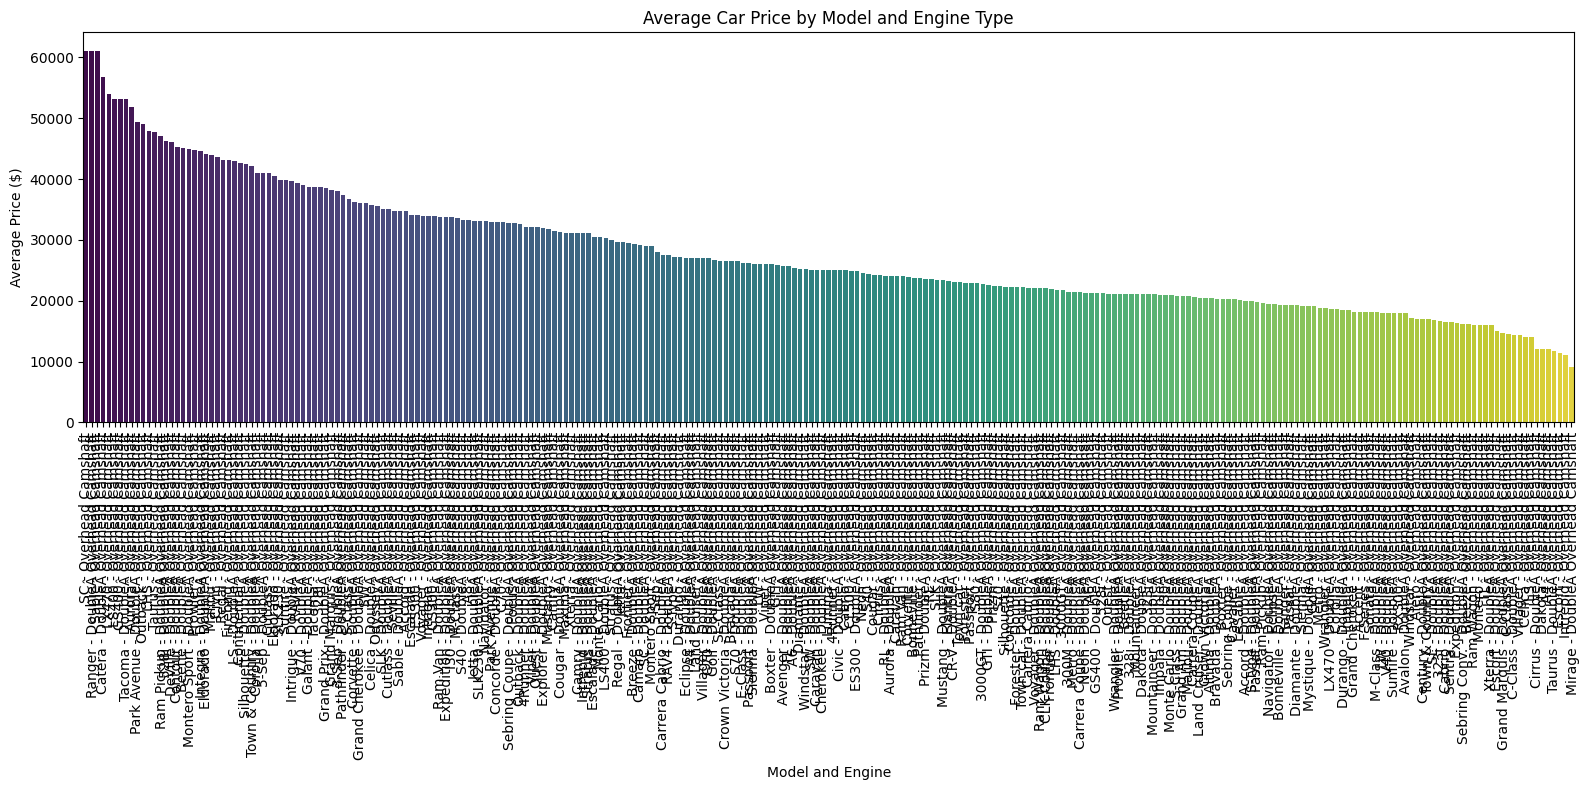

In [ ]:
#15.How does the average car price vary across different car models and engine types?
avg_price_by_model_engine = car_df.groupby(["Model", "Engine"])["Price ($)"].mean().reset_index()
# Sort values for clear plotting
avg_price_by_model_engine = avg_price_by_model_engine.sort_values(by="Price ($)", ascending=False)
# Create a combined label for model and engine
avg_price_by_model_engine["Model_Engine"] = avg_price_by_model_engine["Model"] + " - " + avg_price_by_model_engine["Engine"]
# Plot bar chart
plt.figure(figsize=(16, 8))
sns.barplot(data=avg_price_by_model_engine, x="Model_Engine", y="Price ($)", palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Car Price by Model and Engine Type")
plt.xlabel("Model and Engine")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.show()

EDA - 3
 Amazon Sales Data
 Description:
 This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.
 Features:
 product_id: Unique identifier for each product
 product_name: Name of the product
 category: Category of the product
 discounted_price: Discounted price of the product
 actual_price: Actual price of the product
 discount_percentage: Percentage of discount for the product
 rating: Rating of the product (1-5)
 rating_count: Number of people who voted for the Amazon rating
 about_product: Description about the product
 user_id: ID of the user who wrote the review
 user_name: Name of the user who wrote the review
 review_id: ID of the user review
 review_title: Short review
 review_content: Long review
 img_link: Image link of the product
 product_link: Official website link of the product
 Source:
 Amazon Sales

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("amazon.csv")
# Display all column names
print(df.columns.tolist())

['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']


In [ ]:
#1.What is the average rating for each product category?
df_clean_ratings = df.dropna(subset=['rating', 'category']).copy()
# Convert 'rating' column to numeric
df_clean_ratings['rating'] = pd.to_numeric(df_clean_ratings['rating'], errors='coerce')
# Drop rows where 'rating' could not be converted
df_clean_ratings = df_clean_ratings.dropna(subset=['rating'])
# Extract the main (top-level) category
df_clean_ratings['category'] = df_clean_ratings['category'].str.split('|').str[0]
# Calculate average rating for each main category
average_rating_per_category = (
    df_clean_ratings.groupby('category')['rating'].mean().sort_values(ascending=False).reset_index())
print(average_rating_per_category)



                category    rating
0         OfficeProducts  4.309677
1             Toys&Games  4.300000
2        HomeImprovement  4.250000
3  Computers&Accessories  4.154967
4            Electronics  4.081749
5           Home&Kitchen  4.040716
6    Health&PersonalCare  4.000000
7     MusicalInstruments  3.900000
8          Car&Motorbike  3.800000


In [ ]:
#2.What are the top rating_count products by category?
df_clean = df.dropna(subset=['rating_count']).copy()
# Clean and convert rating_count to integers
df_clean['rating_count'] = df_clean['rating_count'].str.replace(',', '').astype(int)
# Extract the top-level (main) category
df_clean['main_category'] = df_clean['category'].str.split('|').str[0]
# Find the product with the highest rating_count in each main category
top_rated_products = df_clean.loc[df_clean.groupby('main_category')['rating_count'].idxmax()]
# Select relevant columns
top_rated_products_display = top_rated_products[[
    'main_category', 'product_name', 'rating_count', 'rating', 'category']].sort_values(by='rating_count', ascending=False).reset_index(drop=True)
print(top_rated_products_display)



           main_category                                       product_name  \
0            Electronics  AmazonBasics Flexible Premium HDMI Cable (Blac...   
1           Home&Kitchen  Pigeon Polypropylene Mini Handy and Compact Ch...   
2  Computers&Accessories          SanDisk Cruzer Blade 32GB USB Flash Drive   
3     MusicalInstruments  Boya ByM1 Auxiliary Omnidirectional Lavalier C...   
4             Toys&Games  Faber-Castell Connector Pen Set - Pack of 25 (...   
5         OfficeProducts  Casio FX-82MS 2nd Gen Non-Programmable Scienti...   
6        HomeImprovement  Gizga Essentials Cable Organiser, Cord Managem...   
7    Health&PersonalCare  Dr Trust Electronic Kitchen Digital Scale Weig...   
8          Car&Motorbike  Reffair AX30 [MAX] Portable Air Purifier for C...   

   rating_count  rating                                           category  
0        426973     4.4  Electronics|HomeTheater,TV&Video|Accessories|C...  
1        270563     4.1  Home&Kitchen|Kitchen&Dining|Ki

In [ ]:
#3.What is the distribution of discounted prices vs. actual prices?
df_prices = df.dropna(subset=['actual_price', 'discounted_price']).copy()
# Convert price columns to numeric (remove commas)
df_prices['actual_price'] = pd.to_numeric(df_prices['actual_price'].str.replace(',', ''), errors='coerce')
df_prices['discounted_price'] = pd.to_numeric(df_prices['discounted_price'].str.replace(',', ''), errors='coerce')
# Drop rows where conversion failed
df_prices = df_prices.dropna(subset=['actual_price', 'discounted_price'])
# Optional: Filter to remove extreme outliers for better visualization
df_prices = df_prices[(df_prices['actual_price'] < 50000) & (df_prices['discounted_price'] < 50000)]
# Plot histograms for both price columns
plt.figure(figsize=(12, 6))
plt.hist(df_prices['actual_price'], bins=50, alpha=0.5, label='Actual Price', color='blue')
plt.hist(df_prices['discounted_price'], bins=50, alpha=0.5, label='Discounted Price', color='green')
plt.title('Distribution of Actual Prices vs. Discounted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#4.How does the average discount percentage vary across categories?
df["discount_percentage"] = df["discount_percentage"].str.replace("%", "").astype(float)
# Extract the main (top-level) category
df["main_category"] = df["category"].str.split("|").str[0]
# Group by main category and calculate average discount
avg_discount_by_category = (df.groupby("main_category")["discount_percentage"].mean().sort_values(ascending=False))
print(avg_discount_by_category)

main_category
HomeImprovement          57.500000
Computers&Accessories    54.024283
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.120536
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_percentage, dtype: float64


In [ ]:
#5.What are the most popular product names?
product_names = df["product_name"].dropna()
# Count frequency of each product name
most_common_products = product_names.value_counts().head(10)
# Display the top 10 most common product names
print("Top 10 Most Popular Product Names:\n")
for i, (name, count) in enumerate(most_common_products.items(), start=1):
    print(f"{i}. {name} (Count: {count})")

Top 10 Most Popular Product Names:

1. Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution (Count: 5)
2. Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating (Count: 4)
3. Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey) (Count: 3)
4. Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black (Count: 3)
5. Flix Micro Usb Cable For Smartphone (Black) (Count: 3)
6. Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating (Count: 3)
7. Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable 

In [ ]:
#6.What are the most popular product keywords?
import re
from collections import Counter
df = pd.read_csv("amazon.csv")  # Replace with your file path if needed
# Define a basic set of English stopwords manually
custom_stopwords = {
    'the', 'and', 'for', 'with', 'from', 'this', 'that', 'your',
    'you', 'are', 'all', 'use', 'can', 'has', 'have', 'cable',
    'charger', 'fast', 'usb', 'type', 'charging', 'data', 'sync',
    'compatible', 'mobile', 'phone', 'wire', 'port', 'amp', 'output',
    'input', 'adapter', 'connector', 'black', 'white', 'pack', 'set'
}
# Combine all product names into one lowercase string
all_product_names = " ".join(df["product_name"].astype(str)).lower()
# Remove punctuation and numbers, then split into words
words = re.findall(r'\b[a-z]+\b', all_product_names)
# Filter out custom stopwords and short words
filtered_words = [word for word in words if word not in custom_stopwords and len(word) > 1]
# Count word frequencies
word_freq = Counter(filtered_words)
# Get the 20 most common keywords
most_common_keywords = word_freq.most_common(20)
# Print the result
print("Most common product keywords:")
for word, freq in most_common_keywords:
    print(f"{word}: {freq}")

Most common product keywords:
to: 219
in: 178
smart: 175
tv: 152
hd: 135
led: 129
pro: 125
wireless: 119
water: 114
remote: 109
heater: 108
bluetooth: 107
grey: 106
laptop: 105
of: 101
battery: 97
ram: 96
electric: 96
braided: 94
iphone: 92
Most common product keywords:
to: 219
in: 178
smart: 175
tv: 152
hd: 135
led: 129
pro: 125
wireless: 119
water: 114
remote: 109
heater: 108
bluetooth: 107
grey: 106
laptop: 105
of: 101
battery: 97
ram: 96
electric: 96
braided: 94
iphone: 92


In [ ]:
#7.What are the most popular product reviews?
review_texts = df["review_content"].dropna().str.lower()
# Count the most frequently repeated reviews
most_common_reviews = review_texts.value_counts().head(10)
# Display the most common reviews
print("Top 10 Most Repeated Product Reviews:\n")
for i, (review, count) in enumerate(most_common_reviews.items(), start=1):
    print(f"{i}. (Repeated {count} times)\n{review}\n{'-'*80}")

Top 10 Most Repeated Product Reviews:

1. (Repeated 8 times)
i am not big on camera usage, personally. i was even mentally prepared for a bad camera, based on some reviews here. but i was pleasantly surprised that camera clicks good photos. they are not awesome, but they are decent photos that can even be shared.now coming to my biggest grouse; heating issue. the phone started heating up while charging, but it was just a little and so i could have ignored it. but then it started heating up more and got me very concerned. i even ordered a replacement thinking i got a defective piece. but then, after further tests, i found that it is heating more when i download huge amounts of data, for example, when i restore data of my old phone, from back up. this is ok with me as, i don't perform huge data loads regularly, definitely not on phone. then i tested by running tasks i usually perform such as checking office mails, attending office meeting on phone, watching a video from amazon prime, and

In [ ]:
#8.What is the correlation between discounted_price and rating?
print("Sample of discounted_price values:")
print(df['discounted_price'].dropna().unique()[:20])
# Show count of missing values
missing_count = df['discounted_price'].isna().sum()
print(f"\nMissing discounted_price values: {missing_count}")
# Show value counts of a few frequent entries (including non-numeric)
print("\nTop 10 most frequent discounted_price values:")
print(df['discounted_price'].value_counts(dropna=False).head(10))

Sample of discounted_price values:
['₹399' '₹199' '₹329' '₹154' '₹149' '₹176.63' '₹229' '₹499' '₹299' '₹219'
 '₹350' '₹159' '₹349' '₹13,999' '₹249' '₹13,490' '₹970' '₹279' '₹59'
 '₹11,499']

Missing discounted_price values: 0

Top 10 most frequent discounted_price values:
discounted_price
₹199      53
₹299      46
₹399      36
₹499      34
₹349      31
₹599      28
₹1,499    26
₹999      25
₹1,199    23
₹1,799    21
Name: count, dtype: int64


In [ ]:
#9.What are the Top 5 categories based on the highest ratings?
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
# Extract the top-level category if there are multiple
df["main_category"] = df["category"].str.split("|").str[0]
# Drop rows with missing ratings or categories
valid_data = df.dropna(subset=["rating", "main_category"])
# Calculate average rating per category
top_categories_by_rating = (valid_data.groupby("main_category")["rating"].mean().sort_values(ascending=False).head(5))
print(top_categories_by_rating)

main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Name: rating, dtype: float64


In [ ]:
#10.Identify any potential areas for improvement or optimization based on the data analysis?
#1. MISSING VALUE ANALYSIS
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing Values by Column:\n", missing_summary, "\n")
#AVERAGE RATING BY MAIN CATEGORY ----------
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["main_category"] = df["category"].str.split("|").str[0]
rating_by_category = df.groupby("main_category")["rating"].mean().sort_values(ascending=False).head(5)
print("Top 5 Categories by Average Rating:\n", rating_by_category, "\n")
#3. MOST COMMON PRODUCT REVIEWS ----------
most_common_reviews = df["review_content"].dropna().str.lower().value_counts().head(5)
print("Most Repeated Product Reviews:\n", most_common_reviews, "\n")
#4. MOST COMMON PRODUCT NAME KEYWORDS ----------
# Clean and tokenize product names
product_names = " ".join(df["product_name"].dropna().astype(str)).lower()
keywords = re.findall(r'\b[a-z]+\b', product_names)
stopwords = {'the', 'and', 'for', 'with', 'from', 'this', 'that', 'your', 'you', 'are', 'all', 'use', 'can','has', 'have', 'of', 'a', 'an', 'in', 'on', 'to', 'is'}
filtered_keywords = [word for word in keywords if word not in stopwords and len(word) > 2]
keyword_freq = Counter(filtered_keywords).most_common(10)
print("Top 10 Product Name Keywords:\n", keyword_freq, "\n")
#5. DISCOUNTED PRICE QUALITY CHECK ----------
df["discounted_price"] = pd.to_numeric(df["discounted_price"], errors="coerce")
valid_price_count = df["discounted_price"].notnull().sum()
print(f"Valid discounted_price entries: {valid_price_count} / {len(df)}")


Missing Values by Column:
 rating_count           2
rating                 1
product_id             0
product_name           0
category               0
actual_price           0
discounted_price       0
discount_percentage    0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
main_category          0
dtype: int64 

Top 5 Categories by Average Rating:
 main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Name: rating, dtype: float64 

Most Repeated Product Reviews:
 review_content
i am not big on camera usage, personally. i was even mentally prepared for a bad camera, based on some reviews here. but i was pleasantly surprised that camera clicks good photos. they are not awesome, but they are decent photos that 

EDA - 4
 Dataset Link:
Spotify Data:Popular Hip-Hop Artists and Tracks
 Description of the Dataset:
 The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.
 Application in Data Science:
 This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.
 Column Descriptors:
 Artist: The name of the artist, providing direct attribution to the creative mind behind the track.
 Track Name: The title of the track, encapsulating its identity and essence.
 Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.
 Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.
 Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("spotify.csv")
# Display all column names
print(df.columns.tolist())

['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID']


In [ ]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?
print("Null values before cleaning:\n", df.isnull().sum())
df = df.dropna()
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows found: {duplicates}")
df = df.drop_duplicates()
print(f"\nCleaned DataFrame shape: {df.shape}")

Null values before cleaning:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows found: 27

Cleaned DataFrame shape: (413, 5)


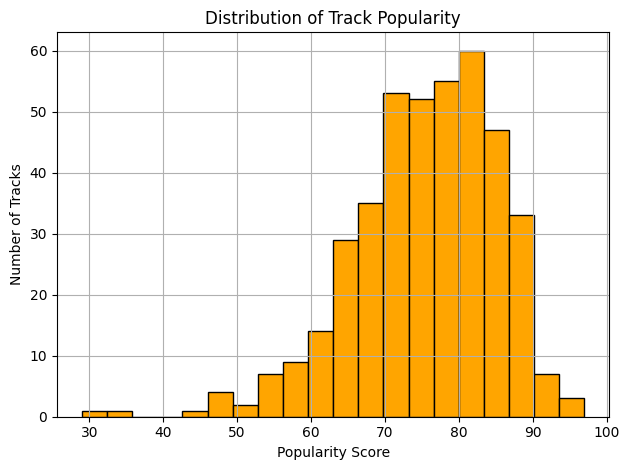

In [ ]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?
df = pd.read_csv("spotify.csv").dropna().drop_duplicates()
# Plot histogram using Matplotlib
plt.hist(df['Popularity'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.tight_layout()
plt.show()

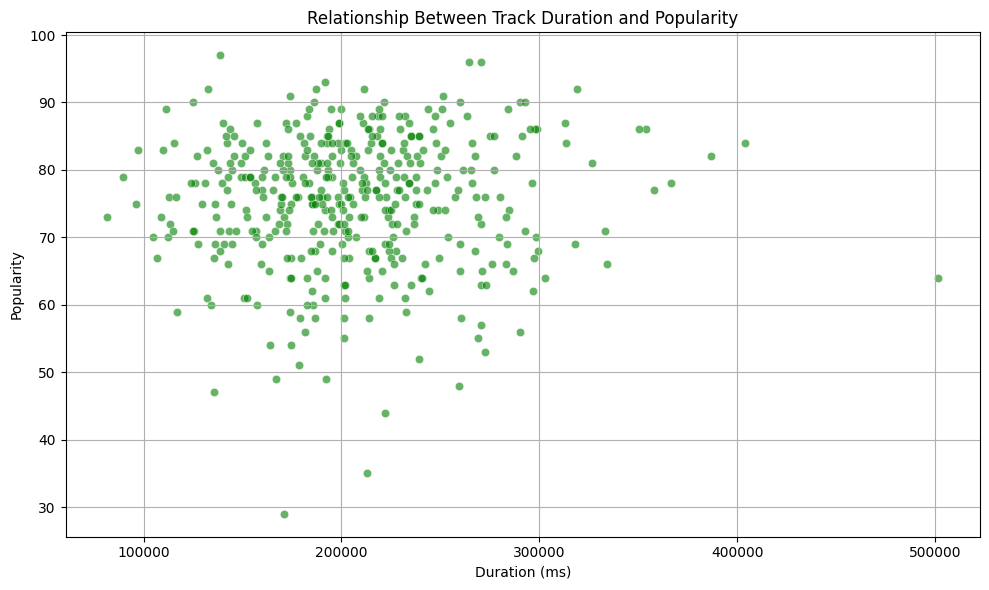

In [ ]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
df = df.dropna().drop_duplicates()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.6, color='green')
plt.title('Relationship Between Track Duration and Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()


Artist with the most tracks: Drake


<ipython-input-32-2e7f72f9e36e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Artist', order=artist_counts.index[:10], palette='viridis')


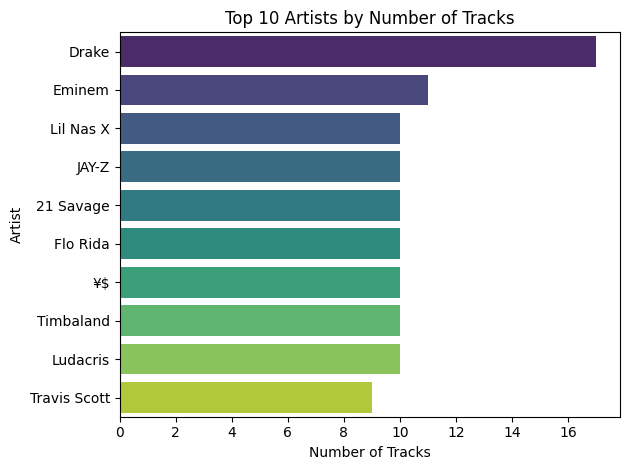

In [ ]:
#4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?
df = df.dropna().drop_duplicates()
artist_counts = df['Artist'].value_counts()
artist_with_most_tracks = artist_counts.idxmax()
print(f"\nArtist with the most tracks: {artist_with_most_tracks}")
sns.countplot(data=df, y='Artist', order=artist_counts.index[:10], palette='viridis')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


In [ ]:
#5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
df = df.dropna().drop_duplicates()
least_popular_tracks = df.nsmallest(5, 'Popularity')
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [ ]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?
top_5_artists = df['Artist'].value_counts().head(5).index
top_artists_df = df[df['Artist'].isin(top_5_artists)]
avg_popularity = top_artists_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("Average Popularity of Top 5 Most Frequent Artists:\n")
print(avg_popularity)

Average Popularity of Top 5 Most Frequent Artists:

Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [ ]:
#7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?
top_5_artists = df['Artist'].value_counts().head(5).index
top_artists_df = df[df['Artist'].isin(top_5_artists)]
most_popular_tracks = top_artists_df.groupby('Artist')['Track Name'].apply(lambda x: x.value_counts().idxmax())
print("Most Popular Tracks Among Top 5 Most Frequent Artists:\n")
print(most_popular_tracks)


Most Popular Tracks Among Top 5 Most Frequent Artists:

Artist
21 Savage                                    née-nah
Drake        Rich Baby Daddy (feat. Sexyy Red & SZA)
Eminem                                    Without Me
JAY-Z                                Ni**as In Paris
Lil Nas X          INDUSTRY BABY (feat. Jack Harlow)
Name: Track Name, dtype: object


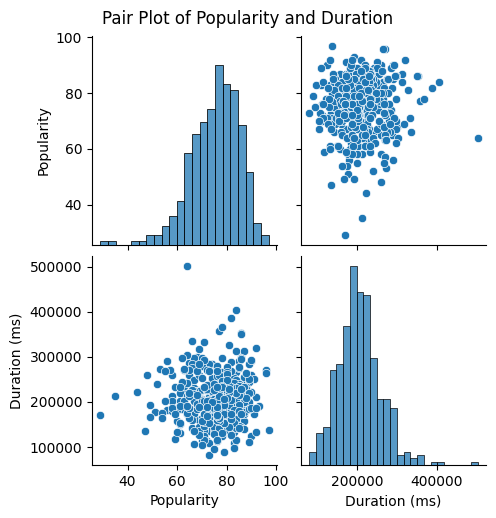

In [ ]:
#8.Visualize relationships between multiple numerical variables simultaneously using a pair plot?
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle('Pair Plot of Popularity and Duration', y=1.02)
plt.show()

<ipython-input-40-3e1fd4be6342>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x='Artist', y='Duration (ms)', palette='pastel')


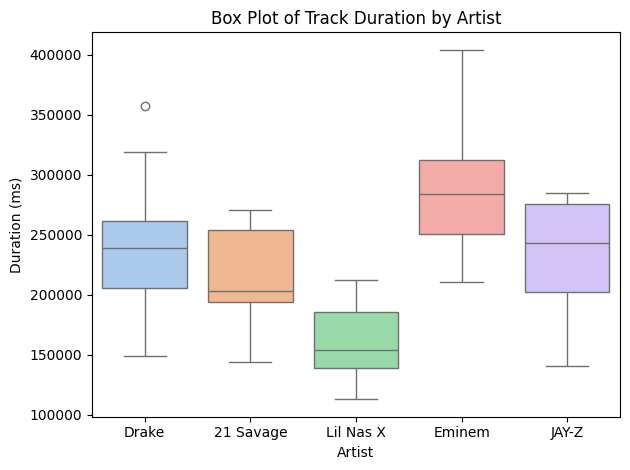

<ipython-input-40-3e1fd4be6342>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=subset_df, x='Artist', y='Duration (ms)', palette='muted')


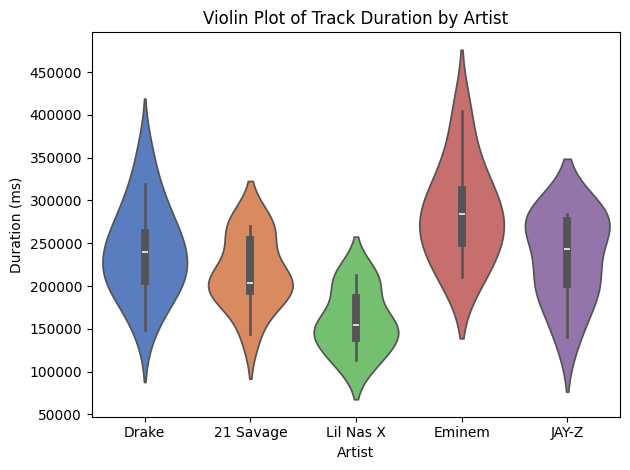

In [ ]:
#9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?
df = df.dropna().drop_duplicates()
top_5_artists = df['Artist'].value_counts().head(5).index
subset_df = df[df['Artist'].isin(top_5_artists)]
sns.boxplot(data=subset_df, x='Artist', y='Duration (ms)', palette='pastel')
plt.title('Box Plot of Track Duration by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.tight_layout()
plt.show()
sns.violinplot(data=subset_df, x='Artist', y='Duration (ms)', palette='muted')
plt.title('Violin Plot of Track Duration by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.tight_layout()
plt.show()


<ipython-input-39-ab590c1da336>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=subset_df, x='Artist', y='Popularity', palette='Set2')


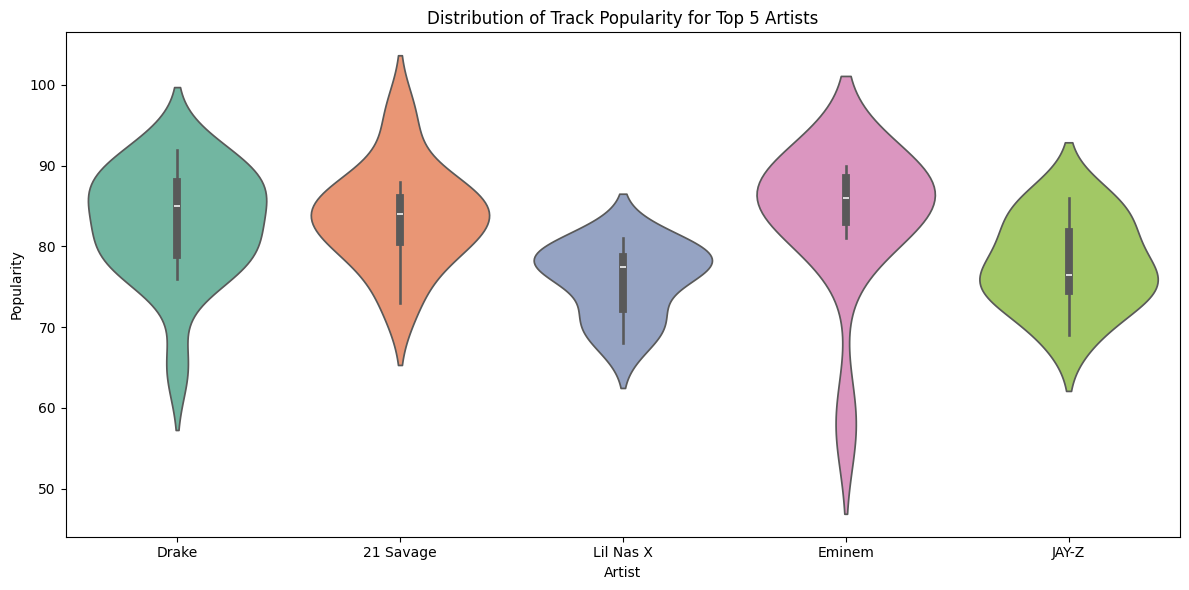

In [ ]:
#10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot?
df = df.dropna().drop_duplicates()
top_5_artists = df['Artist'].value_counts().head(5).index
subset_df = df[df['Artist'].isin(top_5_artists)]
plt.figure(figsize=(12, 6))
sns.violinplot(data=subset_df, x='Artist', y='Popularity', palette='Set2')
plt.title('Distribution of Track Popularity for Top 5 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()